<a href="https://colab.research.google.com/github/Stephenthomas10/EMG-GESTURE-ANALYSIS/blob/main/Copy_of_EMG_Hand_Gesture_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nccvector_electromyography_emg_dataset_path = kagglehub.dataset_download('nccvector/electromyography-emg-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import xgboost as xgb
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
import os
print(nccvector_electromyography_emg_dataset_path)  # See the actual download path


/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1"

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        print(os.path.join(root, file))


/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1/Electro-Myography-EMG-Dataset/README.md
/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1/Electro-Myography-EMG-Dataset/LICENSE
/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1/Electro-Myography-EMG-Dataset/.gitattributes
/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1/Electro-Myography-EMG-Dataset/.git/HEAD
/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1/Electro-Myography-EMG-Dataset/.git/description
/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1/Electro-Myography-EMG-Dataset/.git/index
/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1/Electro-Myography-EMG-Dataset/.git/COMMIT_EDITMSG
/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1/Electro-Myography-EMG-Dataset/.git/config
/

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1/Electro-Myography-EMG-Dataset/extracted_features_and_labeled_dataset(easiest to work with)/emg_all_features_labeled.csv')
raw = pd.read_csv('/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1/Electro-Myography-EMG-Dataset/raw_emg_data_unprocessed/index_finger_motion_raw.csv')
# print(df.head())
print(df.shape, raw.shape)
# print(df.describe)

(6822, 81) (223793, 8)


<Figure size 1200x600 with 0 Axes>

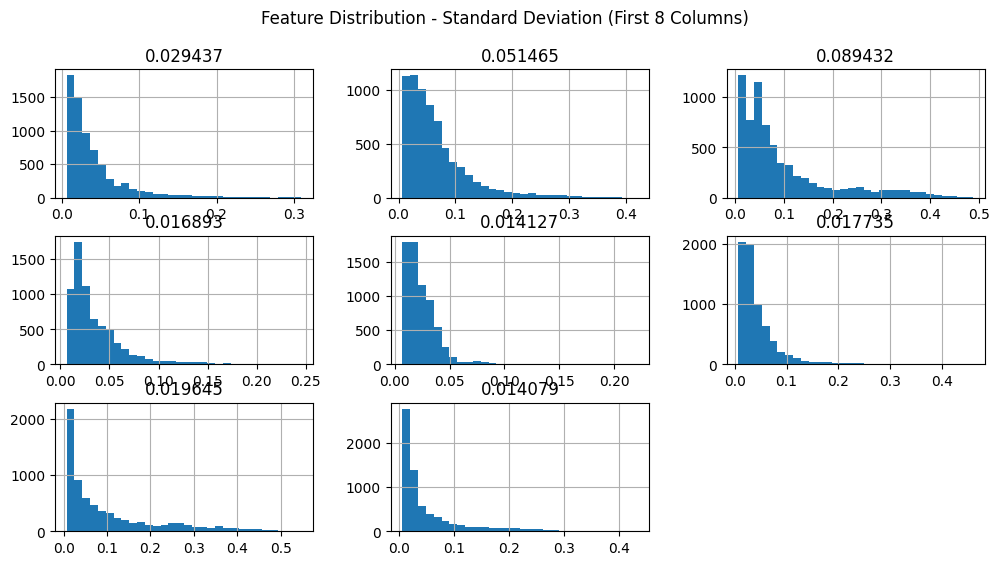

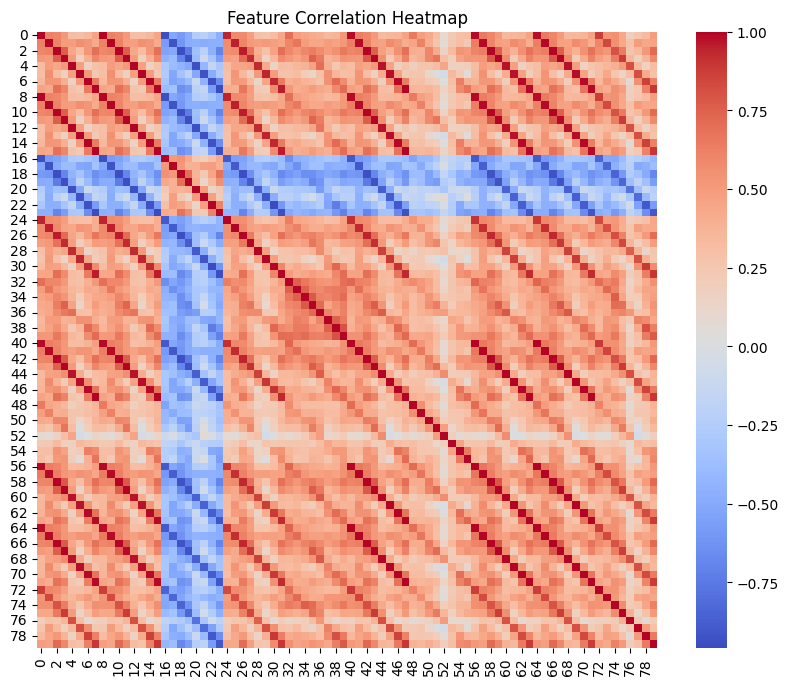

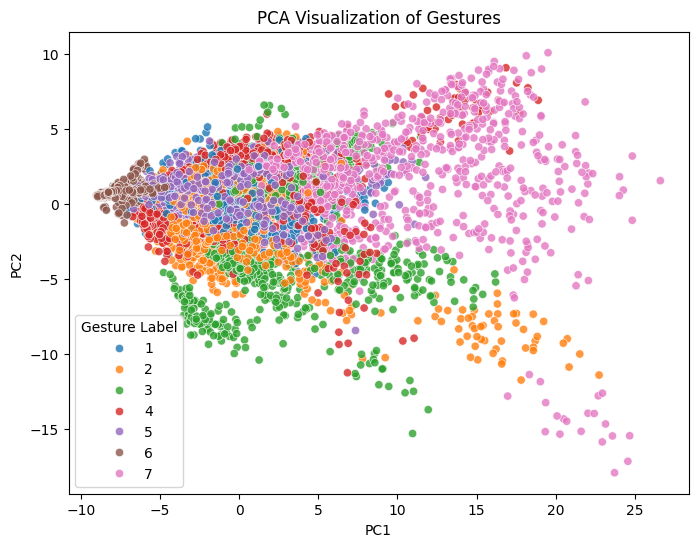

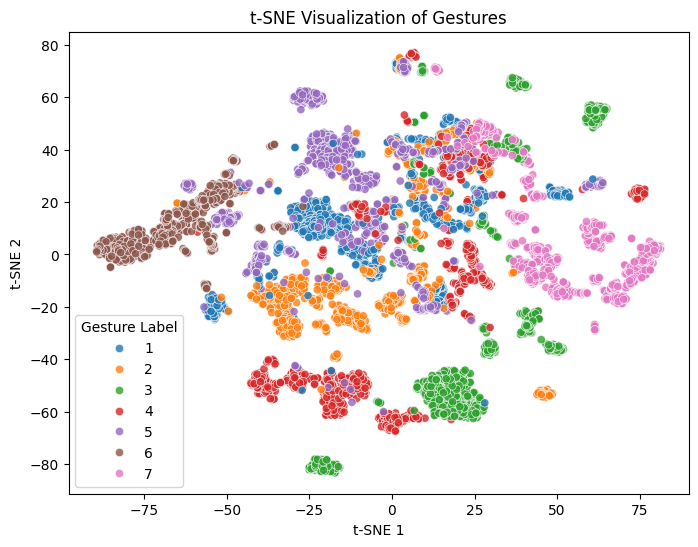

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load Dataset
file_path = "your_data.csv"  # Update with actual path
df = pd.read_csv('/root/.cache/kagglehub/datasets/nccvector/electromyography-emg-dataset/versions/1/Electro-Myography-EMG-Dataset/extracted_features_and_labeled_dataset(easiest to work with)/emg_all_features_labeled.csv')

# Extract Features and Labels
X = df.iloc[:, :-1]  # 80 features
y = df.iloc[:, -1]   # Last column (labels)

# Normalize the Features (Recommended due to range differences)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 1. Feature Distribution: Histogram ---
#If the histogram is right-skewed, the feature has mostly small values with occasional high values.
plt.figure(figsize=(12, 6))
df.iloc[:, :8].hist(figsize=(12, 6), bins=30)
plt.suptitle("Feature Distribution - Standard Deviation (First 8 Columns)")
plt.show()

# --- 2. Feature Correlation Heatmap ---
#High correlation (close to ±1) means features contain redundant info.
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_scaled).corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# --- 3. PCA for Dimensionality Reduction (2D Scatter Plot) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="tab10", alpha=0.8)
plt.title("PCA Visualization of Gestures")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Gesture Label")
plt.show()

# --- 4. t-SNE for Gesture Separation ---
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="tab10", alpha=0.8)
plt.title("t-SNE Visualization of Gestures")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Gesture Label")
plt.show()


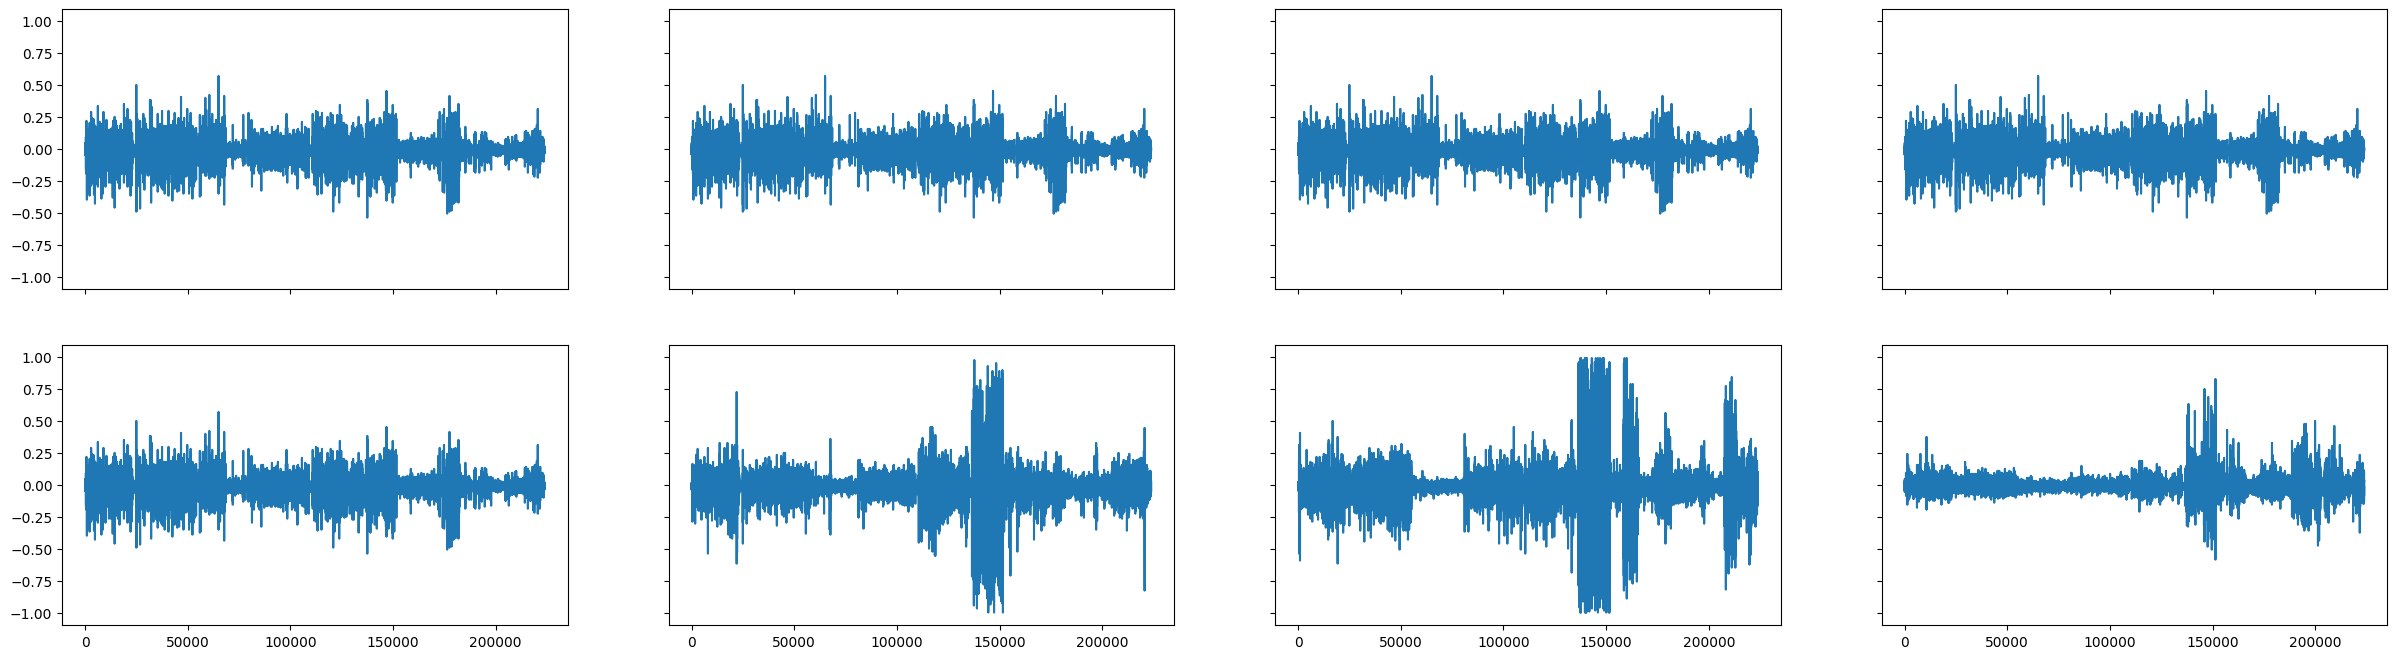

In [ ]:
def plot_data(data):
    fig, axes = plt.subplots(2,4, figsize=(30, 8), sharex=True, sharey=True)
    for i in range(2):
        for j in range(4):
            axes[i][j].plot(data.iloc[:,i*j])

plot_data(raw)

In [ ]:
x = df.iloc[:,:80].copy()
y = df.iloc[:,80].copy()
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

(6822, 80)
(6822,)


In [ ]:
SC = StandardScaler()
x_train = pd.DataFrame(SC.fit_transform(x_train))
x_test = pd.DataFrame(SC.transform(x_test))

In [ ]:
import numpy as np

print(np.unique(y_train))

y_train = y_train - 1
y_test = y_test - 1  # Also adjust test labels

[1 2 3 4 5 6 7]


In [ ]:
model_XGB = xgb.XGBClassifier()
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
model_XGB.fit(x_train, y_train)
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred = model_RF.predict(x_test)
y_p = model_XGB.predict(x_test)
accuracy = accuracy_score(y_test, [q for q in y_pred])
accuracy_p = accuracy_score(y_test, [r for r in y_p])
print("Accuracy for RF: %.2f%%" % (accuracy * 100.0))
print("Accuracy for XGB: %.2f%%" % (accuracy_p * 100.0))

Accuracy for RF: 94.37%
Accuracy for XGB: 94.84%


In [ ]:
inputs = tf.keras.Input(shape=(x.shape[1],))
x = tf.keras.layers.Dense(80, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(80, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(8, activation='softmax')(x)

model_cnn = tf.keras.Model(inputs, outputs)

In [ ]:
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 100

history = model_cnn.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4062 - loss: 1.6075 - val_accuracy: 0.8086 - val_loss: 0.6090 - learning_rate: 0.0010
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7827 - loss: 0.6516 - val_accuracy: 0.8457 - val_loss: 0.4489 - learning_rate: 0.0010
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8248 - loss: 0.4935 - val_accuracy: 0.8760 - val_loss: 0.3880 - learning_rate: 0.0010
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8320 - loss: 0.4888 - val_accuracy: 0.8838 - val_loss: 0.3395 - learning_rate: 0.0010
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.3996 - val_accuracy: 0.8906 - val_loss: 0.3253 - learning_rate: 0.0010
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8678 - loss: 0.3732 - val_accuracy: 0.8945 - val_loss: 0.3093 - learning_rate: 0.0010
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8804 - loss: 0.

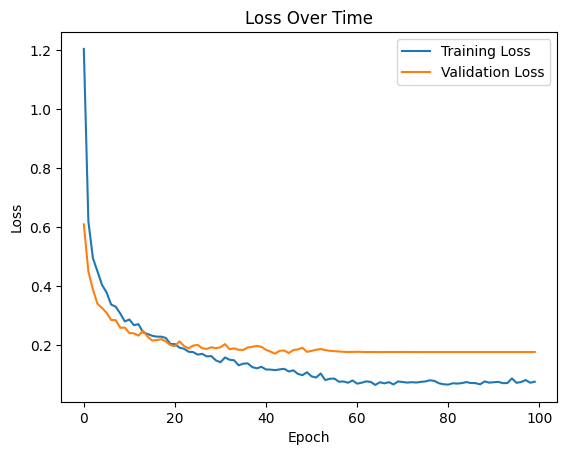

In [ ]:
plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Over Time")

plt.show()

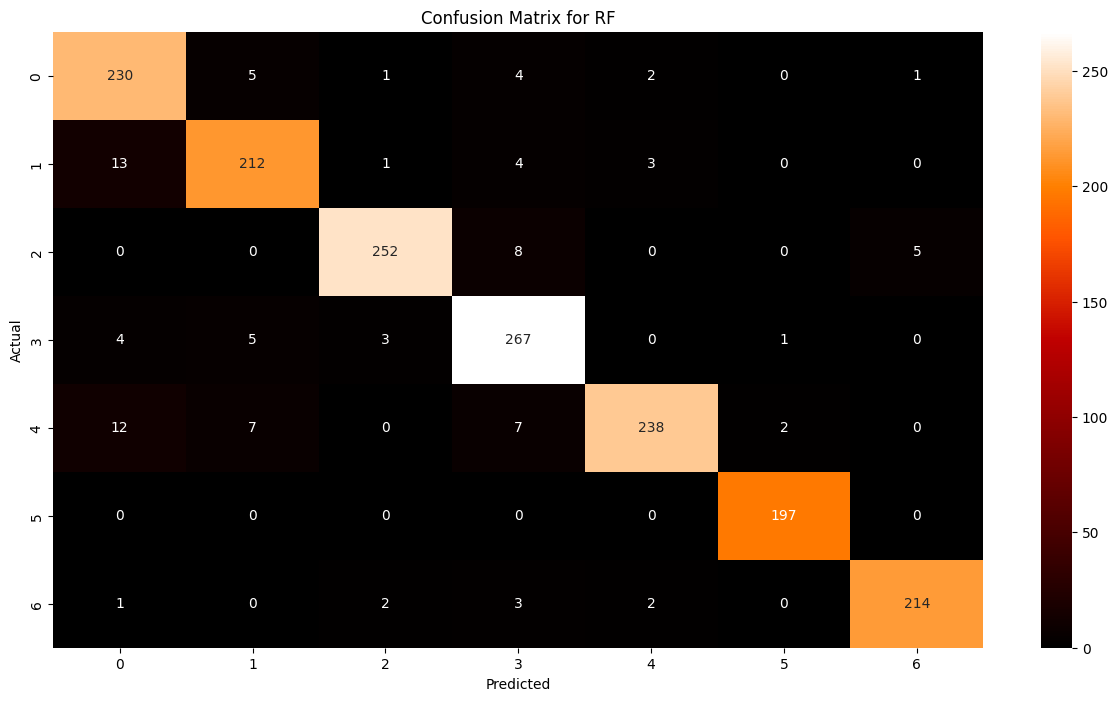

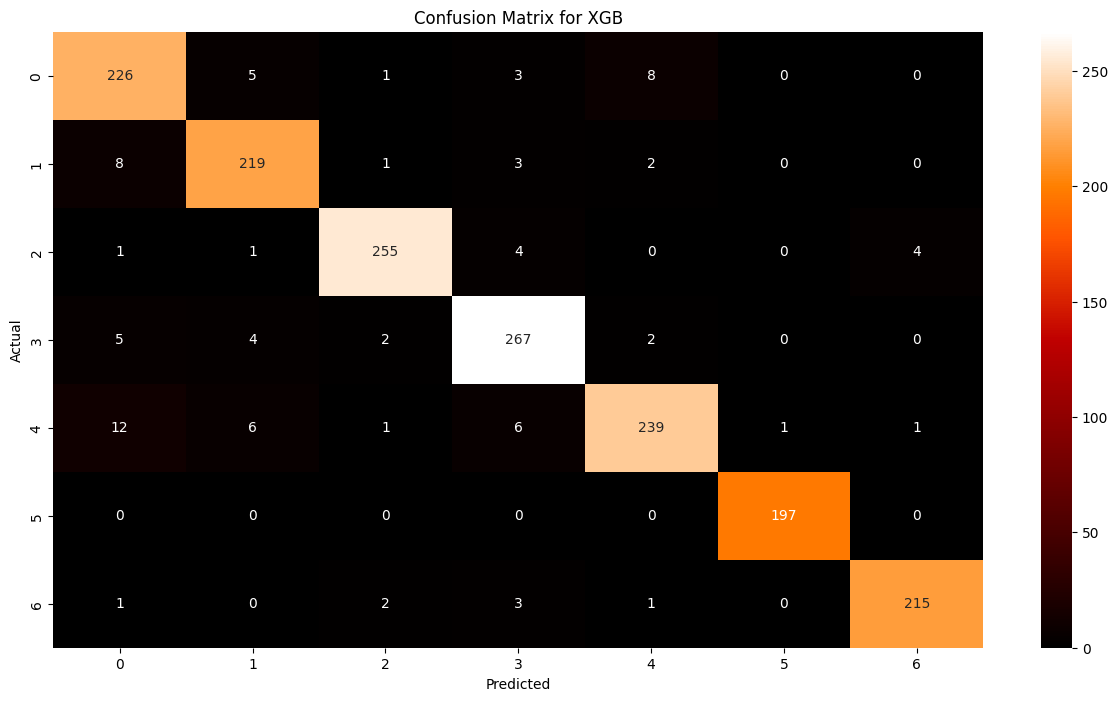

In [ ]:
y_true = np.array(y_test)
y_pred = np.array(model_RF.predict(x_test))
y_pred_xgb = np.array(model_XGB.predict(x_test))

cm = confusion_matrix(y_true, y_pred)
cm_xgb = confusion_matrix(y_true, y_pred_xgb)
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RF")
plt.show()
plt.figure(figsize = (15,8))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGB")
plt.show()

In [ ]:
import joblib
joblib.dump(model_XGB, "xgb_model.pkl")
joblib.dump(model_RF, "rf_model.pkl")
joblib.dump(SC, "scaler.pkl")  # Save StandardScaler
model_cnn.save("cnn_model.h5")


In [ ]:
!pip install gradio
import gradio as gr
import numpy as np
import pandas as pd
import tensorflow as tf
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib  # To save & load models

# Load trained models
model_XGB = joblib.load("xgb_model.pkl")  # Save model after training
model_RF = joblib.load("rf_model.pkl")
model_CNN = tf.keras.models.load_model("cnn_model.h5")

# Load scaler (since input must be standardized)
scaler = joblib.load("scaler.pkl")

# Gesture Mapping
gesture_map = {
    1: "Index Finger",
    2: "Middle Finger",
    3: "Ring Finger",
    4: "Little Finger",
    5: "Thumb",
    6: "Rest",
    7: "Victory Gesture"
}

# Prediction Function (for multiple rows)
def predict_from_csv(file):
    try:
        # Read CSV file
        df = pd.read_csv(file, header=None)  # No header in test data

        # Check if the dataset has 80 columns
        if df.shape[1] != 80:
            return pd.DataFrame({"Error": ["Invalid CSV format. Expected 80 columns per row."]})

        # Normalize input using the same scaler used for training
        df_scaled = scaler.transform(df)

        # Get predictions from each model
        pred_rf = model_RF.predict(df_scaled)
        pred_xgb = model_XGB.predict(df_scaled)
        pred_cnn = np.argmax(model_CNN.predict(df_scaled), axis=1)

        # Map predictions to gestures
        results = {
            "Row": list(range(1, len(df) + 1)),
            "Random Forest Prediction": [gesture_map[p + 1] for p in pred_rf],
            "XGBoost Prediction": [gesture_map[p + 1] for p in pred_xgb],
            "Neural Network Prediction": [gesture_map[p + 1] for p in pred_cnn]
        }

        return pd.DataFrame(results)  # ✅ Convert to DataFrame for proper formatting

    except Exception as e:
        return pd.DataFrame({"Error": [str(e)]})  # Return errors in table format

# Gradio Interface (CSV Upload)
gr.Interface(
    fn=predict_from_csv,
    inputs=gr.File(label="Upload CSV File"),
    outputs=gr.Dataframe(),
    title="EMG Gesture Prediction",
    description="Upload a CSV file with 80 columns per row to predict the corresponding gestures.",
).launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bd90172031c4667120.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
import tensorflow as tf
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib  # To save & load models
import os

# Load trained models
model_XGB = joblib.load("xgb_model.pkl")  # If used in preprocessing
model_RF = joblib.load("rf_model.pkl")
model_CNN = tf.keras.models.load_model("cnn_model.h5")

# Load scaler (since input must be standardized)
scaler = joblib.load("scaler.pkl")

# Gesture Mapping
gesture_map = {
    1: "Index Finger",
    2: "Middle Finger",
    3: "Ring Finger",
    4: "Little Finger",
    5: "Thumb",
    6: "Rest",
    7: "Victory Gesture"
}

# Image Path in Colab
gesture_images = {
    "Index Finger": "https://i.imgur.com/MFOamOp.jpeg",
    "Middle Finger": "https://i.imgur.com/mvuwUkB.jpeg",
    "Ring Finger": "https://i.imgur.com/RiSIE1e.jpeg",
    "Little Finger": "https://i.imgur.com/4wr0Nvr.jpeg",
    "Thumb": "https://upload.wikimedia.org/wikipedia/commons/a/a4/Jempol_Ngadep_Atas_%28cropped%29.jpgg",
    "Rest": "https://i.imgur.com/Kl4nDYS.jpeg",
    "Victory Gesture": "https://i.imgur.com/rQEaAtz.jpeg"
}

# Prediction Function
def predict_from_csv(file):
    try:
        df = pd.read_csv(file, header=None)  # No header in test data

        # Validate CSV format
        if df.shape[1] != 80:
            return "Invalid CSV format. Expected 80 columns per row."

        # Normalize input
        df_scaled = scaler.transform(df)

        # Get Neural Network Predictions
        pred_cnn = np.argmax(model_CNN.predict(df_scaled), axis=1)
        nn_predictions = [gesture_map[p + 1] for p in pred_cnn]  # Convert to gesture names

        # Get corresponding image paths
        images = [gesture_images[gesture] for gesture in nn_predictions]

        # Create (text, image) tuples for Gradio
        result = [[gesture, img] for gesture, img in zip(nn_predictions, images)]

        return result

    except Exception as e:
        return f"Error: {str(e)}"

# Gradio Interface
gr.Interface(
    fn=predict_from_csv,
    inputs=gr.File(label="Upload CSV File"),
    outputs=gr.Gallery(label="Predicted Gestures", columns=2),  # Set columns directly here
    title="EMG Gesture Prediction",
    description="Upload a CSV file (80 columns per row) to predict the gesture and view the corresponding image."
).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://603bb0e8d46aad41db.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install streamlit pyngrok joblib pandas numpy tensorflow
!ngrok authtoken 2tLaASu4onH7UqfY4LkmjOX2NrD_4Xouh63oE1iVgiMQLXiRT



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
import os

# Load trained model
model_CNN = tf.keras.models.load_model("/content/cnn_model.h5")

# Load scaler
scaler = joblib.load("/content/scaler.pkl")

# Gesture Mapping
gesture_map = {
    1: "Index Finger",
    2: "Middle Finger",
    3: "Ring Finger",
    4: "Little Finger",
    5: "Thumb",
    6: "Rest",
    7: "Victory Gesture"
}

# Image Paths (Assuming images are stored in Google Colab /content/ folder)
gesture_images = {
    "Index Finger": "/content/index finger.jpg",
    "Middle Finger": "/content/middle finger.jpg",
    "Ring Finger": "/content/ring finger.jpg",
    "Little Finger": "/content/pinky finger.jpg",
    "Thumb": "/content/thumb finger .jpg",
    "Rest": "/content/rest gesture.jpg",
    "Victory Gesture": "/content/victory gesture.jpg"
}

# Prediction function
def predict_from_csv(uploaded_file):
    try:
        df = pd.read_csv(uploaded_file, header=None)

        if df.shape[1] != 80:
            st.error("Invalid CSV format. Expected 80 columns per row.")
            return None

        # Normalize input
        df_scaled = scaler.transform(df)

        # Get Neural Network Predictions
        pred_cnn = np.argmax(model_CNN.predict(df_scaled), axis=1)
        nn_predictions = [gesture_map[p + 1] for p in pred_cnn]

        return nn_predictions

    except Exception as e:
        st.error(f"Error: {str(e)}")
        return None

# Streamlit UI
st.title("EMG Gesture Prediction")
st.write("Upload a CSV file to predict gestures and view corresponding images.")

uploaded_file = st.file_uploader("Choose a CSV file", type=["csv"])

if uploaded_file:
    predictions = predict_from_csv(uploaded_file)

    if predictions:
        st.write("### Predictions:")
        for gesture in predictions:
            st.write(f"**Predicted Gesture:** {gesture}")

            # Display image
            image_path = gesture_images.get(gesture, None)
            if image_path and os.path.exists(image_path):
                st.image(image_path, caption=gesture, use_column_width=True)
            else:
                st.write(f"⚠️ Image not found for {gesture}")


Overwriting app.py


In [ ]:
!streamlit run app.py &>/content/logs.txt &


In [ ]:
from pyngrok import ngrok

# Manually start ngrok with a correct configuration
public_url = ngrok.connect(8501, "http")
print(f"Streamlit is running at: {public_url}")


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2tLagXBEY6LeTOMswYz5w8GJZtw, tn_2tLcIo0OnAQbgWeSN4E4E883j5H, tn_2tLceGyKnwEIn8H8wcb8f9lZrHv\n\r\n\r\nERR_NGROK_324\r\n"}}
